In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

In [3]:
tf.config.experimental.list_physical_devices()


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
(X_train, y_train) , (X_test , y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [9]:
y_train[1]

array([9], dtype=uint8)

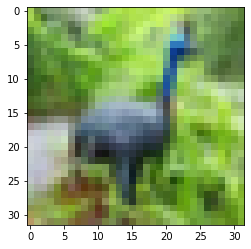

In [13]:
plt.imshow(X_train[6])

In [6]:
classes = ['airplane','automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [14]:
classes[y_train[6][0]]

'bird'

In [15]:
32*32*3

3072

In [16]:
from sklearn.preprocessing import StandardScaler

X_train_flat = np.reshape(X_train, (X_train.shape[0], 3072))

In [17]:
X_train_flat.shape

(50000, 3072)

25

In [18]:
X_train_flat_scaled = StandardScaler().fit_transform(X_train_flat)

In [1]:
model_only_flat = keras.Sequential([
    keras.layers.Dense(1000, input_shape=(3072,), activation = 'relu'),
    keras.layers.Dense(10,  activation='sigmoid')
])

callback = tf.keras.callbacks.TensorBoard(log_dir='logs/No_Scaling', histogram_freq=1)

model_only_flat.compile(
    optimizer = 'adam',
    metrics = ['accuracy'],
    loss = 'sparse_categorical_crossentropy'
)

model_only_flat.fit(X_train_flat , y_train, epochs = 10, callbacks=[callback])

NameError: name 'keras' is not defined

In [ ]:
model_scaled = keras.Sequential([
    keras.layers.Dense(1000, input_shape=(3072,), activation = 'relu'),
    keras.layers.Dense(10,  activation='sigmoid')
])

callback = tf.keras.callbacks.TensorBoard(log_dir='logs/', histogram_freq=1)

model_scaled.compile(
    optimizer = 'adam',
    metrics = ['accuracy'],
    loss = 'sparse_categorical_crossentropy'
)

model_scaled.fit(X_train_flat_scaled , y_train, epochs = 10, callbacks=[callback])

In [21]:
model = keras.Sequential([
    keras.layers.Dense(1000, input_shape=(3072,), activation = 'relu'),
    keras.layers.Dense(10,  activation='sigmoid')
])
model.compile(
    optimizer = 'adam',
    metrics = ['accuracy'],
    loss = 'sparse_categorical_crossentropy'
)

model.fit(X_train_flat_scaled , y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 36s 22ms/step - loss: 2.3651 - accuracy: 0.3827
Epoch 2/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.7075 - accuracy: 0.4322
Epoch 3/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.6929 - accuracy: 0.4482
Epoch 4/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.6461 - accuracy: 0.4723
Epoch 5/10
1563/1563 [==============================] - 35s 23ms/step - loss: 1.5950 - accuracy: 0.4942
Epoch 6/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.5507 - accuracy: 0.5108
Epoch 7/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.5048 - accuracy: 0.5274
Epoch 8/10
1563/1563 [==============================] - 35s 23ms/step - loss: 1.4607 - accuracy: 0.5422
Epoch 9/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.4166 - accuracy: 0.5601
Epoch 10/10
1563/1563 [==============================] - 32s 20m

In [22]:
model1 = keras.Sequential([
    keras.layers.Dense(3000, input_shape=(3072,), activation = 'relu'),
    keras.layers.Dense(1000, activation = 'relu'),
    keras.layers.Dense(10,  activation='sigmoid')
])
model1.compile(
    optimizer = 'adam',
    metrics = ['accuracy'],
    loss = 'sparse_categorical_crossentropy'
)

model1.fit(X_train_flat_scaled , y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 113s 72ms/step - loss: 1.7847 - accuracy: 0.3781
Epoch 2/10
1563/1563 [==============================] - 113s 72ms/step - loss: 1.5967 - accuracy: 0.4384
Epoch 3/10
1563/1563 [==============================] - 117s 75ms/step - loss: 1.5302 - accuracy: 0.4596
Epoch 4/10
1563/1563 [==============================] - 116s 74ms/step - loss: 1.4725 - accuracy: 0.4807
Epoch 5/10
1563/1563 [==============================] - 117s 75ms/step - loss: 1.4145 - accuracy: 0.5055
Epoch 6/10
1563/1563 [==============================] - 118s 75ms/step - loss: 1.3617 - accuracy: 0.5202
Epoch 7/10
1563/1563 [==============================] - 118s 76ms/step - loss: 1.3158 - accuracy: 0.5379
Epoch 8/10
1563/1563 [==============================] - 120s 77ms/step - loss: 1.2706 - accuracy: 0.5567
Epoch 9/10
1563/1563 [==============================] - 120s 77ms/step - loss: 1.2272 - accuracy: 0.5717
Epoch 10/10
1563/1563 [==============================] 

In [26]:
y_train_categorical = keras.utils.to_categorical(y_train, 10, 'float32')

In [29]:
y_train_categorical.shape

(50000, 10)

In [30]:
model1 = keras.Sequential([
    keras.layers.Dense(3000, input_shape=(3072,), activation = 'relu'),
    keras.layers.Dense(1000, activation = 'relu'),
    keras.layers.Dense(10,  activation='sigmoid')
])

model1.compile(
    optimizer = 'SGD',
    metrics = ['accuracy'],
    loss = 'categorical_crossentropy'
)

model1.fit(X_train_flat_scaled , y_train_categorical, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 109s 70ms/step - loss: 1.6073 - accuracy: 0.4364
Epoch 2/10
1563/1563 [==============================] - 105s 67ms/step - loss: 1.3038 - accuracy: 0.5483
Epoch 3/10
1563/1563 [==============================] - 98s 63ms/step - loss: 1.1449 - accuracy: 0.6063
Epoch 4/10
1563/1563 [==============================] - 87s 56ms/step - loss: 1.0072 - accuracy: 0.6588
Epoch 5/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.8854 - accuracy: 0.7030
Epoch 6/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.7662 - accuracy: 0.7458
Epoch 7/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.6606 - accuracy: 0.7844
Epoch 8/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.5580 - accuracy: 0.8246
Epoch 9/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.4639 - accuracy: 0.8590
Epoch 10/10
1563/1563 [==============================] - 75s 4

In [32]:
model1.evaluate(X_train_flat_scaled , y_train)

ValueError: in user code:

    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1557, in test_function  *
        return step_function(self, iterator)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1546, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1535, in run_step  **
        outputs = model.test_step(data)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1501, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\losses.py", line 1787, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\backend.py", line 5119, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


In [33]:
model1.evaluate(X_train_flat_scaled , y_train_categorical)

1563/1563 [==============================] - 25s 16ms/step - loss: 0.3076 - accuracy: 0.9194


[0.30759742856025696, 0.9193599820137024]